In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [139]:
credit_data = pd.read_csv('credit_data.csv')

In [140]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [141]:
credit_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [142]:
credit_data.shape

(1000, 10)

In [143]:
credit_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [144]:
credit_data['Saving accounts'].describe()

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

In [145]:
credit_data['Saving accounts'].fillna('little', inplace = True)

In [146]:
credit_data['Checking account'].describe()

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object

In [147]:
credit_data['Checking account'].fillna('little', inplace = True)

In [148]:
credit_data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [149]:
credit_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,little,little,9055,36,education,good
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,little,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


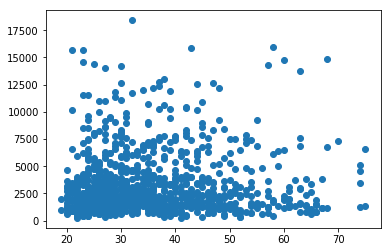

In [150]:
plt.scatter(credit_data['Age'], credit_data['Credit amount'])

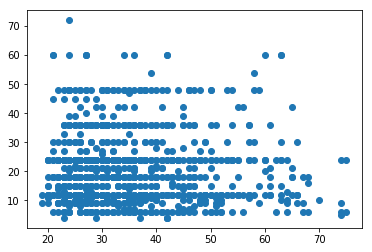

In [151]:
plt.scatter(credit_data['Age'], credit_data['Duration'])

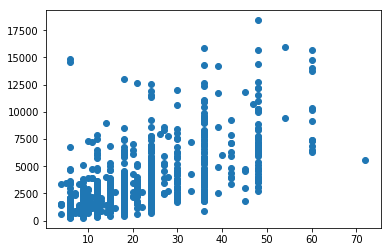

In [152]:
plt.scatter(credit_data['Duration'], credit_data['Credit amount'])

In [153]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [154]:
credit_data_pred = km.fit_predict(credit_data[['Duration', 'Credit amount','Age']])
credit_data_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0,

In [155]:
credit_data['Cluster'] = credit_data_pred
credit_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,2
2,49,male,1,own,little,little,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,2
4,53,male,2,free,little,little,4870,24,car,bad,2
5,35,male,1,free,little,little,9055,36,education,good,1
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good,0
7,35,male,3,rent,little,moderate,6948,36,car,good,2
8,61,male,1,own,rich,little,3059,12,radio/TV,good,0
9,28,male,3,own,little,moderate,5234,30,car,bad,2


In [156]:
credit_data0 = credit_data[credit_data.Cluster == 0]
credit_data1 = credit_data[credit_data.Cluster == 1]
credit_data2 = credit_data[credit_data.Cluster == 2]

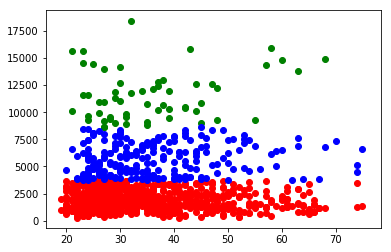

In [157]:
plt.scatter(credit_data0['Age'], credit_data0['Credit amount'], color = 'red')
plt.scatter(credit_data1['Age'], credit_data1['Credit amount'], color = 'green')
plt.scatter(credit_data2['Age'], credit_data2['Credit amount'], color = 'blue')

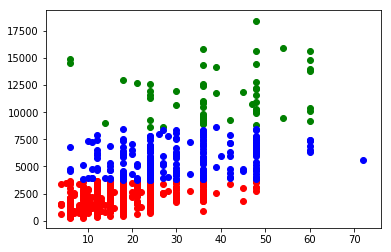

In [158]:
plt.scatter(credit_data0['Duration'], credit_data0['Credit amount'], color = 'red')
plt.scatter(credit_data1['Duration'], credit_data1['Credit amount'], color = 'green')
plt.scatter(credit_data2['Duration'], credit_data2['Credit amount'], color = 'blue')

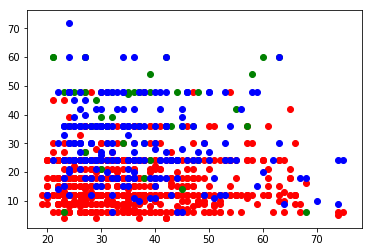

In [159]:
plt.scatter(credit_data0['Age'], credit_data0['Duration'], color = 'red')
plt.scatter(credit_data1['Age'], credit_data1['Duration'], color = 'green')
plt.scatter(credit_data2['Age'], credit_data2['Duration'], color = 'blue')

In [160]:
scaler = MinMaxScaler()
scaler.fit(credit_data[['Age', 'Duration']])
credit_data[['Age', 'Duration']] = scaler.transform(credit_data[['Age', 'Duration']])
credit_data.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Cluster
0,0.857143,male,2,own,little,little,1169,0.029412,radio/TV,good,0
1,0.053571,female,2,own,little,moderate,5951,0.647059,radio/TV,bad,2
2,0.535714,male,1,own,little,little,2096,0.117647,education,good,0
3,0.464286,male,2,free,little,little,7882,0.558824,furniture/equipment,good,2
4,0.607143,male,2,free,little,little,4870,0.294118,car,bad,2


In [161]:
km = KMeans(n_clusters = 3)

In [162]:
credit_data_pred1 = km.fit_predict(credit_data[['Age', 'Duration']])
credit_data_pred1

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1,

In [163]:
credit_data.drop('Cluster', axis = 1, inplace = True)

In [164]:
credit_data['Cluster'] = credit_data_pred1
credit_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Cluster
0,0.857143,male,2,own,little,little,1169,0.029412,radio/TV,good,1
1,0.053571,female,2,own,little,moderate,5951,0.647059,radio/TV,bad,2
2,0.535714,male,1,own,little,little,2096,0.117647,education,good,1
3,0.464286,male,2,free,little,little,7882,0.558824,furniture/equipment,good,2
4,0.607143,male,2,free,little,little,4870,0.294118,car,bad,1
5,0.285714,male,1,free,little,little,9055,0.470588,education,good,2
6,0.607143,male,2,own,quite rich,little,2835,0.294118,furniture/equipment,good,1
7,0.285714,male,3,rent,little,moderate,6948,0.470588,car,good,2
8,0.750000,male,1,own,rich,little,3059,0.117647,radio/TV,good,1
9,0.160714,male,3,own,little,moderate,5234,0.382353,car,bad,2


In [165]:
credit_data0 = credit_data[credit_data.Cluster == 0]
credit_data1 = credit_data[credit_data.Cluster == 1]
credit_data2 = credit_data[credit_data.Cluster == 2]

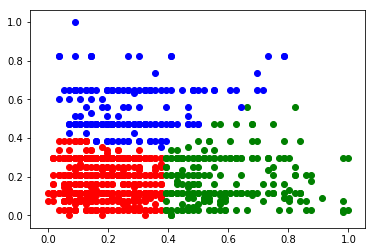

In [166]:
plt.scatter(credit_data0['Age'], credit_data0['Duration'], color = 'red')
plt.scatter(credit_data1['Age'], credit_data1['Duration'], color = 'green')
plt.scatter(credit_data2['Age'], credit_data2['Duration'], color = 'blue')

In [168]:
k_range = range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(credit_data[['Duration', 'Age', 'Credit amount']])
    sse.append(km.inertia_)

In [169]:
sse

[7959875700.074336,
 2405205061.0574913,
 1281660899.7865465,
 649636234.1827655,
 467499381.6669117,
 317644172.78218514,
 232489651.41514415,
 181605506.2043752,
 148705330.14735997]

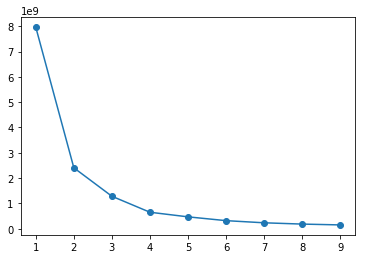

In [170]:
plt.plot(k_range, sse, marker = 'o')